In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = 'VR_noHEMveto_2018Aonly'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(bkg_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_mass_refit', 'sel_vtx_mass_low_refit', 'sel_vtx_pt_refit', 'sel_vtx_eta_refit', 'sel_vtx_phi_refit', 'sel_vtx_dR_refit', 'sel_vtx_mass_refit_vs_sel_vtx_mass', 'sel_vtx_mass_low_refit_vs_sel_vtx_mass_low', 'se

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
QCD,0.00000248,0.00000003,0.00000002,0.00000002,0.00000002,0.00000002,0.00000000,0.00000000
WJets,0.00101329,0.00000519,0.00000279,0.00000265,0.00000263,0.00000261,0.00000163,0.00000054
TTX,0.00136440,0.00001833,0.00000551,0.00000542,0.00000539,0.00000531,0.00000007,0.00000177
SingleTop,0.00023564,0.00000196,0.00000067,0.00000061,0.00000061,0.00000061,0.00000034,0.00000013
ZJets,0.00242166,0.00001459,0.00000851,0.00000799,0.00000789,0.00000782,0.00000531,0.00000183
TTbar,0.00044365,0.00000622,0.00000216,0.00000201,0.00000198,0.00000197,0.00000122,0.00000046
ZGamma,0.00032470,0.00000257,0.00000139,0.00000122,0.00000122,0.00000122,0.00000082,0.00000020
Multiboson,0.00065914,0.00000399,0.00000198,0.00000182,0.00000174,0.00000171,0.00000107,0.00000029
DY-M50,0.00039399,0.00000412,0.00000209,0.00000197,0.00000197,0.00000196,0.00000122,0.00000050
DY-M4to50,0.00002646,0.00000032,0.00000017,0.00000016,0.00000016,0.00000016,0.00000008,0.00000002


In [8]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_noHEMveto_2018Aonly/Cutflow/Efficiency//Background_Efficiency.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
QCD,"12,013.26",160.71,102.30,102.30,102.30,100.64,0.00,0.00
WJets,"39,980.77",204.97,110.22,104.67,103.85,102.91,64.37,21.16
TTX,95.43,1.28,0.39,0.38,0.38,0.37,0.00,0.12
SingleTop,825.74,6.88,2.36,2.15,2.15,2.13,1.19,0.46
ZJets,"11,676.92",70.36,41.04,38.50,38.03,37.71,25.62,8.81
TTbar,"4,973.21",69.72,24.24,22.57,22.20,22.06,13.73,5.11
ZGamma,375.19,2.97,1.60,1.41,1.41,1.41,0.95,0.23
Multiboson,"1,035.02",6.27,3.11,2.86,2.74,2.69,1.67,0.46
DY-M50,981.08,10.25,5.20,4.90,4.90,4.87,3.03,1.24
DY-M4to50,84.93,1.02,0.53,0.52,0.52,0.52,0.25,0.05


In [10]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_noHEMveto_2018Aonly/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
QCD,31603,167,45,45,45,38,0,0
WJets,1171204,6465,2920,2841,2833,2742,1324,491
TTX,141391,1937,580,550,534,516,329,128
SingleTop,46314,324,112,98,98,96,50,16
ZJets,729756,5715,3257,3135,3126,3075,1771,609
TTbar,519733,7192,2485,2308,2266,2251,1391,520
ZGamma,6511,70,37,33,33,33,19,3
Multiboson,24553,165,87,82,80,78,49,18
DY-M50,272468,3265,1297,1273,1272,1239,606,248
DY-M4to50,25923,343,177,175,175,169,78,26


In [12]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_noHEMveto_2018Aonly/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [13]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 37.64


In [14]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['Vtx CosCollinear < 0']).transpose(), pd.DataFrame(bkg_cts_raw_df['Vtx CosCollinear < 0']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,QCD,WJets,TTX,SingleTop,ZJets,TTbar,ZGamma,Multiboson,DY-M50,DY-M4to50,Total
Weighted Counts,0.00,21.16,0.12,0.46,8.81,5.11,0.23,0.46,1.24,0.05,37.64
Raw Counts,0.00,491.00,128.00,16.00,609.00,520.00,3.00,18.00,248.00,26.00,"2,059.00"


## Data

In [15]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
data_2018_Data_MET_UL18_MET_Run2018A,"124,602.0",865.0,296.0,248.0,246.0,242.0,124.0,55.0
Total,"124,602.0",865.0,296.0,248.0,246.0,242.0,124.0,55.0


In [16]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df['Vtx CosCollinear < 0']).transpose()

data_composition = data_composition.rename(index={'Vtx CosCollinear < 0': 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Total
Data Yield,55.0,55.0


In [17]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                 1.7
n(good vertex) > 0            1.6
No b-tagged jets              1.0
Leading jet |eta| < 2.4       0.9
Leading jet pT > 80 GeV       0.9
dPhi(MET,leading jet) > 1.5   0.9
dPhi(MET,all jets) > 0.75     1.1
Vtx CosCollinear < 0          1.5
Name: Total, dtype: float64

In [18]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                 124,602.0
n(good vertex) > 0                865.0
No b-tagged jets                  296.0
Leading jet |eta| < 2.4           248.0
Leading jet pT > 80 GeV           246.0
dPhi(MET,leading jet) > 1.5       242.0
dPhi(MET,all jets) > 0.75         124.0
Vtx CosCollinear < 0               55.0
Name: Total, dtype: float64

In [19]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                 72,041.6
n(good vertex) > 0               534.4
No b-tagged jets                 291.0
Leading jet |eta| < 2.4          280.3
Leading jet pT > 80 GeV          278.5
dPhi(MET,leading jet) > 1.5      275.3
dPhi(MET,all jets) > 0.75        110.8
Vtx CosCollinear < 0              37.6
Name: Total, dtype: float64

/tmp/ipykernel_3120663/3130413513.py:17: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


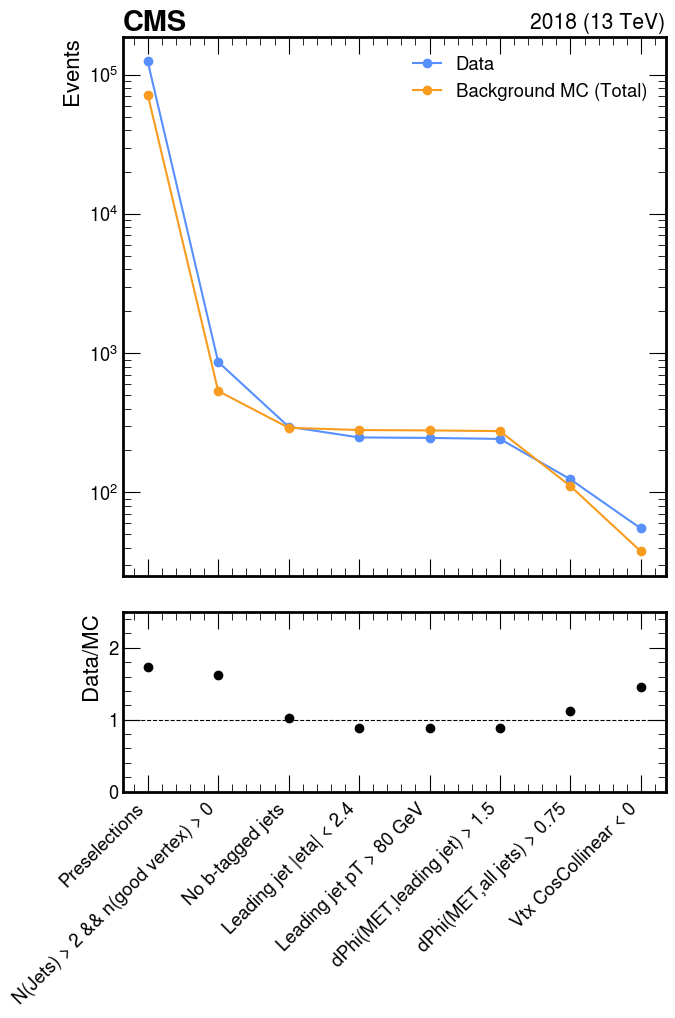

In [20]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')



### Plot the efficiency

Saved: ./plots/VR_noHEMveto_2018Aonly/cutflow//Cutflow_background.png


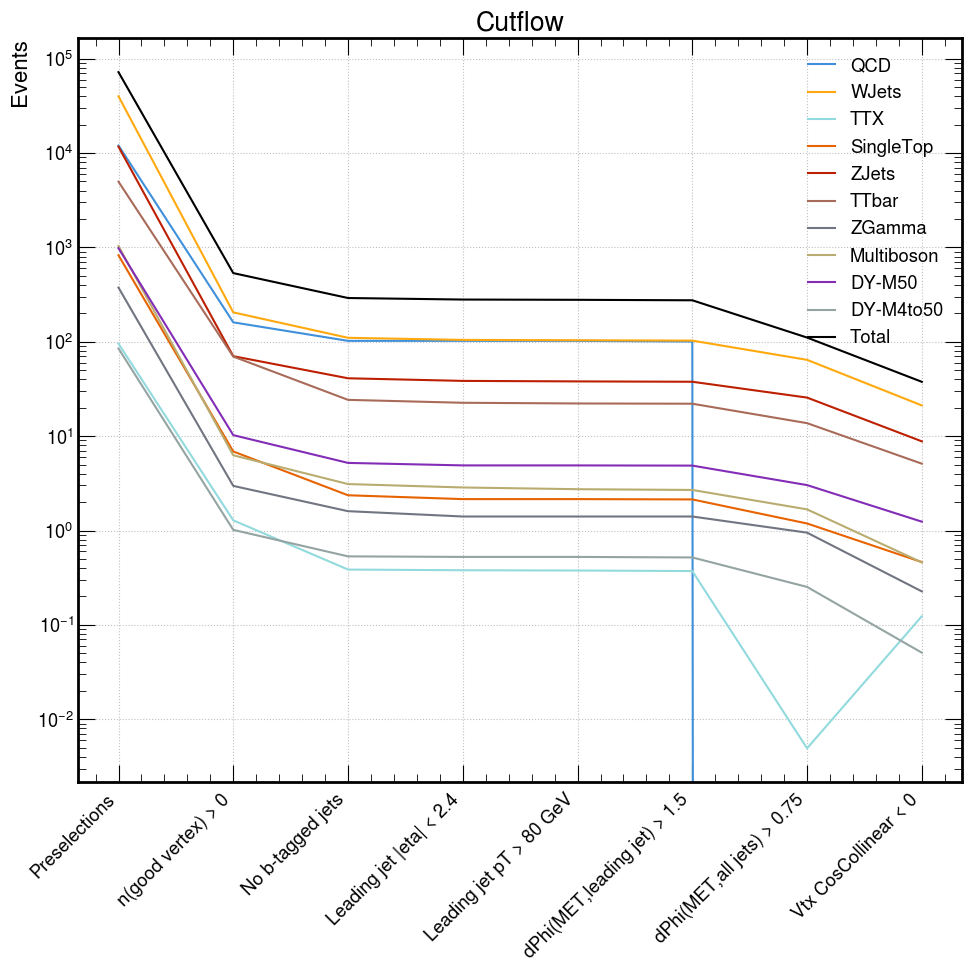

In [21]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [22]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                 124,602.0
n(good vertex) > 0                865.0
No b-tagged jets                  296.0
Leading jet |eta| < 2.4           248.0
Leading jet pT > 80 GeV           246.0
dPhi(MET,leading jet) > 1.5       242.0
dPhi(MET,all jets) > 0.75         124.0
Vtx CosCollinear < 0               55.0
Name: Total, dtype: float64

In [23]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
QCD,"12,013.3",160.7,102.3,102.3,102.3,100.6,0.0,0.0
WJets,"39,980.8",205.0,110.2,104.7,103.9,102.9,64.4,21.2
TTX,95.4,1.3,0.4,0.4,0.4,0.4,0.0,0.1
SingleTop,825.7,6.9,2.4,2.2,2.2,2.1,1.2,0.5
ZJets,"11,676.9",70.4,41.0,38.5,38.0,37.7,25.6,8.8
TTbar,"4,973.2",69.7,24.2,22.6,22.2,22.1,13.7,5.1
ZGamma,375.2,3.0,1.6,1.4,1.4,1.4,0.9,0.2
Multiboson,"1,035.0",6.3,3.1,2.9,2.7,2.7,1.7,0.5
DY-M50,981.1,10.2,5.2,4.9,4.9,4.9,3.0,1.2
DY-M4to50,84.9,1.0,0.5,0.5,0.5,0.5,0.3,0.1


In [ ]:
cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
bkg_cmap = {
    "QCD": cmap[0],
    "WJets": cmap[1],
    "ZJets": cmap[2],
    "DY-M4to50": cmap[3],
    "DY-M50": cmap[4],
    "TTbar": cmap[5],
    "SingleTop": cmap[6],
    "Multiboson": cmap[7],
    "ZGamma": cmap[8],
    "TTX": cmap[9]
}

df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
processes = df.index.values.tolist()

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good_vtx) > 0'
cuts[2] = 'b-jet veto Loose WP'

# Color map for each process
for process in processes:
    if 'Total' in process:
        plt.plot(cuts, df.loc[process], label=process, color='black')
    else:
        plt.plot(cuts, df.loc[process], label=process, color = bkg_cmap[process])

# plot data
df_data = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
plt.plot(cuts, df_data.loc['Total'], label='Data: Run2018[A-D]', color = 'blue', marker='o', linestyle='--')

if plot_dict_bkg_eff['doLog']:
    plt.yscale('log')

if plot_dict_bkg_eff['ylim'] != None:
    plt.ylim(plot_dict_bkg_eff['ylim'][0], plot_dict_bkg_eff['ylim'][1])
    
plt.grid()
    
plt.ylabel(plot_dict_bkg_eff['ylabel'])
plt.title(plot_dict_bkg_eff['title'])
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
plt.legend(loc='upper right')
    
if plot_dict_bkg_eff['doSave']:
    os.makedirs(plot_dict_bkg_eff['outDir'], exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    print(f"Saved: {plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    
plt.show()

Saved: ./plots/VR_noHEMveto_2018Aonly/cutflow//Cutflow_background.png
